# Homework 4

## Dylan Lam

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:


| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [163]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix


# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [164]:
df = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [165]:
df.columns

Index(['07290D3599E7A0D62097A346EFCC1FB5', 'E7750A37CAB07D0DFF0AF7E3573AC141',
       '2013-01-01 00:00:00', '2013-01-01 00:02:00', '120', '0.44',
       '-73.956528', '40.716976', '-73.962440', '40.715008', 'CSH', '3.50',
       '0.50', '0.50.1', '0.00', '0.00.1', '4.50'],
      dtype='object')

In [166]:
# 1. Add column headers based on the description

# Create a blank row with NaN values
blank_row = pd.DataFrame([pd.Series([None] * len(df.columns), index=df.columns)], index=[0])

# Concatenate the blank row with the original DataFrame
df = pd.concat([blank_row, df]).reset_index(drop=True)

# Extracting the data listen in the column headers
row0 = df.columns

# Assign index_values to the first row of the DataFrame
df.iloc[0] = row0

df.columns = ['medallion', 'hack license', 'pickup datetime', 'dropoff datetime', 'trip time in secs', 'trip distance', 'pickup longitude', 'pickup latitude', 'dropoff longitude','dropoff latitude', 'payment type', 'fare amount', 'surcharge', 'mta tax', 'tip amount', 'tolls amount', 'total amount']

df.head(3)

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.0,0.0,0.0,0.0,0.0,CSH,27.0,0.0,0.5,0.0,0.0,27.5
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0


In [167]:
# Identify rows with values in 'tolls amount' and 'mta tax' columns having two decimal places
double_decimal_rows = df[(df['tolls amount'].apply(lambda x: len(str(x).split('.')[1]) == 2)) |
                  (df['mta tax'].apply(lambda x: len(str(x).split('.')[1]) == 2))].index

double_decimal_rows


Index([    0,   952,  1394,  5690,  5901,  7280,  7460,  7522,  8162,  8393,
        8846,  8923,  9142,  9643,  9800, 10396, 11145, 12188, 12528, 14406,
       14622, 16041, 16456, 16503, 17428, 17970, 18867, 19654, 19775, 23196,
       23883, 24785, 25202, 25260, 25941, 26558, 26748, 26964, 27378, 27386,
       28016, 28068, 28083, 28112, 28400, 28663, 28842, 29433, 29869, 30217,
       30256, 30348, 30966, 31538, 31762, 32782, 33104, 34620, 35524, 36032,
       36759, 36763, 37712, 38127, 39085, 39317, 39375, 39839, 40421, 41382,
       41753, 41935, 43207, 43656, 43711, 44675, 45369, 46200, 47065, 47266,
       47344, 47548, 48092, 48583, 48785, 48807, 49251, 49375, 49989],
      dtype='int64')

In [168]:
# Drop the identified rows with double decimals
df = df.drop(double_decimal_rows).reset_index(drop=True)

In [169]:
# 2. Drop rows where 'trip distance' is less than 1 and 'fare amount' is greater than 20
df = df.drop(df[(df['trip distance'] < 1) & (df['fare amount'] > 20)].index)

In [170]:
# 3. Convert 'pickup datetime' and 'dropoff datetime' columns to datetime data type
df[['pickup datetime', 'dropoff datetime']] = df[['pickup datetime', 'dropoff datetime']].apply(pd.to_datetime)

# To check
type(df['pickup datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [171]:
df[df.columns[[4, 5, 11, 12, 13, 14, 15, 16]]].dtypes


trip time in secs    object
trip distance        object
fare amount          object
surcharge            object
mta tax              object
tip amount           object
tolls amount         object
total amount         object
dtype: object

In [172]:
# 4. Dealing with strings in numeric columns: Convert columns to numeric, coercing errors to NaN

columns_to_convert = df.columns[[4, 5, 11, 12, 13, 14, 15, 16]]  # Columns indices 4, 5, 11, and 12 to 16

# Convert the selected columns to numeric, coercing errors to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Checking sum of NaN calues in each column
print('Number of NaN in each column: \n', df.isnull().sum())
print('\n Datatypes of values in each column:\n',df[df.columns[[4, 5, 11, 12, 13, 14, 15, 16]]].dtypes)

Number of NaN in each column: 
 medallion            0
hack license         0
pickup datetime      0
dropoff datetime     0
trip time in secs    0
trip distance        0
pickup longitude     0
pickup latitude      0
dropoff longitude    0
dropoff latitude     0
payment type         0
fare amount          0
surcharge            0
mta tax              0
tip amount           0
tolls amount         0
total amount         0
dtype: int64

 Datatypes of values in each column:
 trip time in secs      int64
trip distance        float64
fare amount          float64
surcharge            float64
mta tax              float64
tip amount           float64
tolls amount         float64
total amount         float64
dtype: object


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

In [173]:
df.columns

Index(['medallion', 'hack license', 'pickup datetime', 'dropoff datetime',
       'trip time in secs', 'trip distance', 'pickup longitude',
       'pickup latitude', 'dropoff longitude', 'dropoff latitude',
       'payment type', 'fare amount', 'surcharge', 'mta tax', 'tip amount',
       'tolls amount', 'total amount'],
      dtype='object')

In [174]:
# Your code here
# Calculating pairwise correlations
correlation_distance_time = df['trip distance'].corr(df['trip time in secs'])
correlation_distance_fare = df['trip distance'].corr(df['fare amount'])
correlation_time_fare = df['trip time in secs'].corr(df['fare amount'])

# Printing correlation coefficients
print('Correlation between trip distance and trip time:', correlation_distance_time)
print('Correlation between trip distance and fare amount:', correlation_distance_fare)
print('Correlation between trip time and fare amount:', correlation_time_fare)


Correlation between trip distance and trip time: 0.7742306614071012
Correlation between trip distance and fare amount: 0.9493768179761388
Correlation between trip time and fare amount: 0.8621511394878147


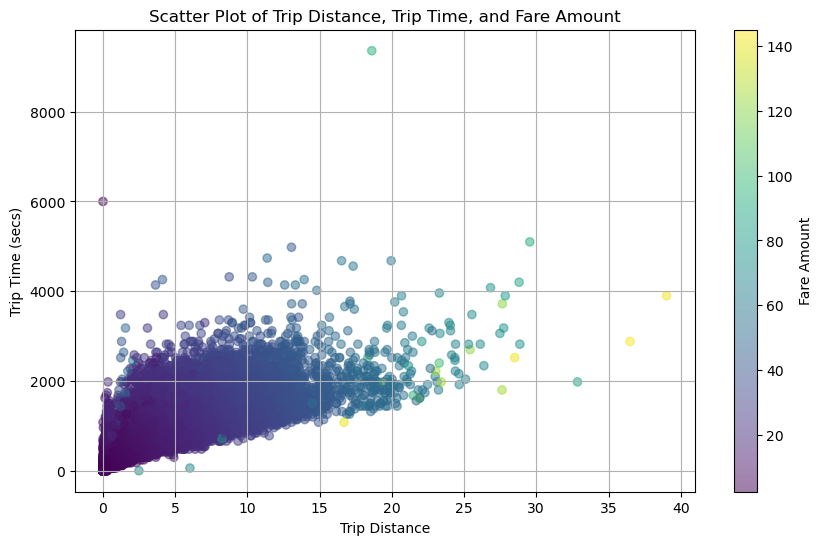

In [175]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['trip distance'], df['trip time in secs'], c=df['fare amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Trip Time (secs)')
plt.title('Scatter Plot of Trip Distance, Trip Time, and Fare Amount')
plt.grid(True)
plt.show()

                   fare amount  trip time in secs  trip distance
fare amount           1.000000           0.862151       0.949377
trip time in secs     0.862151           1.000000       0.774231
trip distance         0.949377           0.774231       1.000000


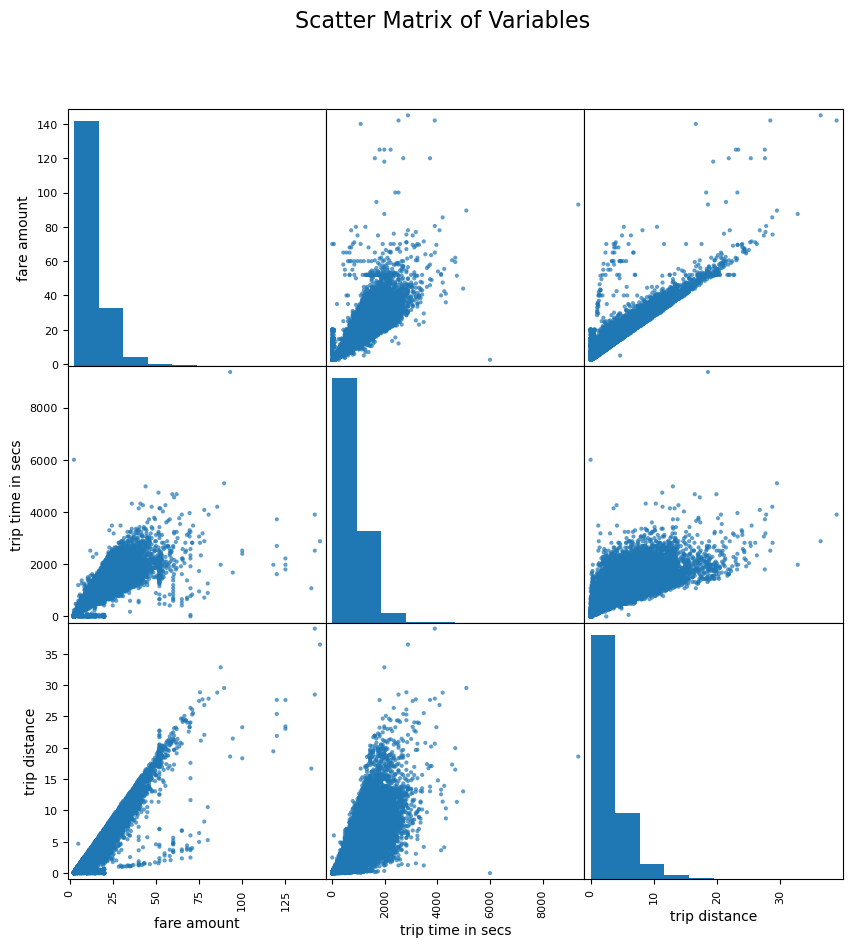

In [176]:
# Assuming 'df' is your DataFrame containing the data
correlations = df[['fare amount', 'trip time in secs', 'trip distance']]

# Calculating the correlation matrix
print(correlations.corr())

# Plotting the scatter matrix
correlation_plots = scatter_matrix(correlations, alpha=0.7, figsize=(10, 10))

# Adding titles to the subplots
plt.suptitle('Scatter Matrix of Variables', fontsize=16)
plt.show()

#### **Correlations**

The correlations provided represent the pairwise correlations between different variables in the dataset. 

1. **fare amount vs. trip time in secs**: The correlation coefficient between fare amount and trip time in seconds is 0.862151. This indicates a strong positive correlation, suggesting that as the duration of the trip increases, the fare amount tends to increase as well.

2. **fare amount vs. trip distance**: The correlation coefficient between fare amount and trip distance is 0.949377. This also indicates a strong positive correlation, implying that as the distance traveled during the trip increases, the fare amount tends to increase proportionally.

3. **trip time in secs vs. trip distance**: The correlation coefficient between trip time in seconds and trip distance is 0.774231. This indicates a moderately strong positive correlation, suggesting that as the distance traveled during the trip increases, the duration of the trip in seconds tends to increase as well, but to a lesser extent compared to the correlations with fare amount.

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.


Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that the relationship between the variables is linear, meaning that changes in the independent variables are associated with changes in the dependent variable by a constant factor.

The linear regression model fits a line to the data points in such a way that it minimizes the vertical distance between the observed data points and the predicted values along the line. The line is determined by the coefficients (slopes) associated with each independent variable and an intercept term.

**Model Training:** During the training phase, the linear regression algorithm adjusts the values of B0 and B1 to minimize the difference between the predicted values and the actual values in the training data. It does so by optimizing a cost function, typically the sum of squared errors (SSE) or mean squared error (MSE).

**Coefficient Estimation:** The coefficients B0 and B1 are estimated using mathematical techniques such as ordinary least squares (OLS) regression, which aims to minimize the sum of squared differences between the observed and predicted values.

**Model Evaluation:** Once trained, the model's performance is evaluated using various metrics such as R squared (coefficient of determination), mean squared error, or root mean squared error. These metrics help assess how well the model fits the data and makes accurate predictions.

**Prediction:** After training and evaluation, the model can be used to make predictions on new data by applying the learned coefficients to the independent variables.

In [177]:
# Extracting features (trip distance) and target (fare amount)
X = df[['trip distance']]
y = df['fare amount']

# initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Printing the coefficients
print("Regression Coefficients:")
print("Slope (Coefficient):", coefficients)
print("Intercept:", intercept)

# Printing linear regression equation
print("\nLinear Regression Equation:")
print("fare amount =", coefficients[0], "* trip distance +", intercept)

# Using the model to predict the fare amount for a 3 miles trip
trip_distance_3_miles = 3
fare_amount_predicted = model.predict([[trip_distance_3_miles]])
print("\nPredicted fare amount for a 3 miles trip:", fare_amount_predicted[0])

Regression Coefficients:
Slope (Coefficient): [2.81435521]
Intercept: 3.857585015856799

Linear Regression Equation:
fare amount = 2.814355205938494 * trip distance + 3.857585015856799

Predicted fare amount for a 3 miles trip: 12.300650633672282


/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


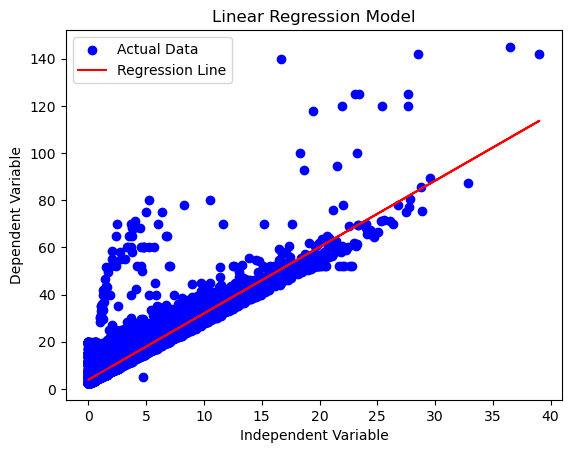

In [178]:
# Scatterplot of actual data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Model')

# Add legend
plt.legend()

# Show plot
plt.show()

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [179]:
# Your code here
X = df[['trip distance', 'trip time in secs']].values
y = df['total amount']

multiple_model = LinearRegression()
multiple_model.fit(X, y)

multiple_coef = multiple_model.coef_
multiple_intercept = multiple_model.intercept_

total_amount_pred = multiple_model.predict([[3, 360]])[0]

# Write down the Multiple Linear Regression equation
print("Multiple Linear Regression Equation:")
print("Total Amount = {:.2f} * Trip Distance + {:.2f} * Travel Time + {:.2f}".format(multiple_coef[0], multiple_coef[1], multiple_intercept))

print("Predicted Total Amount for a 3 miles trip and 6 min travel time:", total_amount_pred)


Multiple Linear Regression Equation:
Total Amount = 2.35 * Trip Distance + 0.01 * Travel Time + 3.25
Predicted Total Amount for a 3 miles trip and 6 min travel time: 12.313799522445079


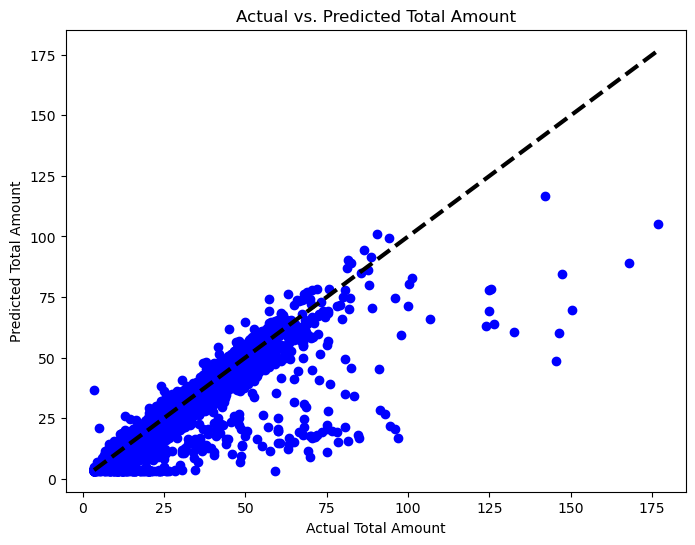

In [180]:
# Get predictions
y_pred = multiple_model.predict(X)

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs. Predicted Total Amount')
plt.show()

In this plot:

- The diagonal line represents the perfect prediction line.
- Each point on the plot represents one data instance.
- Points above the diagonal line indicate overestimation, while points below the line indicate underestimation.

## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

In [181]:
df.dtypes

medallion                    object
hack license                 object
pickup datetime      datetime64[ns]
dropoff datetime     datetime64[ns]
trip time in secs             int64
trip distance               float64
pickup longitude             object
pickup latitude              object
dropoff longitude            object
dropoff latitude             object
payment type                 object
fare amount                 float64
surcharge                   float64
mta tax                     float64
tip amount                  float64
tolls amount                float64
total amount                float64
dtype: object

Iteration: 1, Cost: 109.53418560879412
Iteration: 2, Cost: 105.83614533867727
Iteration: 3, Cost: 102.26967109329783
Iteration: 4, Cost: 98.83007968397155
Iteration: 5, Cost: 95.51285462563912
Iteration: 6, Cost: 92.31364020285253
Iteration: 7, Cost: 89.22823574698916
Iteration: 8, Cost: 86.25259011717557
Iteration: 9, Cost: 83.38279637766918
Iteration: 10, Cost: 80.61508666470502
Iteration: 11, Cost: 77.94582723606318
Iteration: 12, Cost: 75.37151369685266
Iteration: 13, Cost: 72.88876639523932
Iteration: 14, Cost: 70.4943259820682
Iteration: 15, Cost: 68.18504912854657
Iteration: 16, Cost: 65.95790439636089
Iteration: 17, Cost: 63.809968254802136
Iteration: 18, Cost: 61.73842123966608
Iteration: 19, Cost: 59.740544248882316
Iteration: 20, Cost: 57.81371497000448
Iteration: 21, Cost: 55.95540443486852
Iteration: 22, Cost: 54.16317369689178
Iteration: 23, Cost: 52.43467062664775
Iteration: 24, Cost: 50.76762682150591
Iteration: 25, Cost: 49.15985462527696
Iteration: 26, Cost: 47.609244

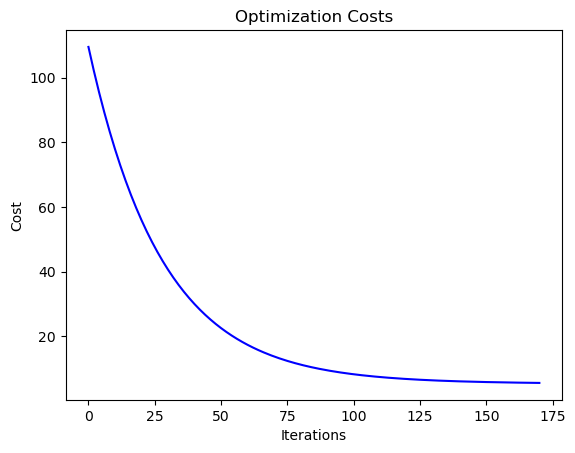

In [182]:
# Extract feature vectors and target vector
X_trip_distance = df['trip distance'].values
y_fare_amount = df['fare amount'].values

# Define the learning rate
learning_rate = 0.001  # Adjust the learning rate

# Define the maximum number of iterations
max_iterations = 400  # Adjust the maximum number of iterations

# Define the precision for convergence
precision = 0.01

# Initialize coefficients (slope and intercept)
theta0 = 0  # Intercept
theta1 = 0  # Coefficient for trip distance

# Define the cost function (Mean Squared Error)
def compute_cost(X_trip_distance, y_fare_amount, theta0, theta1):
    m = len(y_fare_amount)
    predictions = theta0 + theta1 * X_trip_distance
    cost = (1 / (2 * m)) * np.sum((predictions - y_fare_amount) ** 2)
    return cost

# Initialize lists to store costs and iterations
cost_history = []
iteration_history = []

# Gradient Descent algorithm
for iteration in range(max_iterations):
    # Compute predictions
    predictions = theta0 + theta1 * X_trip_distance
    
    # Compute gradients
    gradient_theta0 = (1 / len(y_fare_amount)) * np.sum(predictions - y_fare_amount)
    gradient_theta1 = (1 / len(y_fare_amount)) * np.sum((predictions - y_fare_amount) * X_trip_distance)
    
    # Update coefficients using gradients
    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1
    
    # Compute cost
    cost = compute_cost(X_trip_distance, y_fare_amount, theta0, theta1)
    
    # Store cost and iteration
    cost_history.append(cost)
    iteration_history.append(iteration)
    
    # Print iteration and cost
    print(f"Iteration: {iteration + 1}, Cost: {cost}")
    
    # Check for convergence
    if len(cost_history) > 1 and np.abs(cost_history[-1] - cost_history[-2]) < precision:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Print regression coefficients
print("Regression Coefficients:")
print(f"Intercept (theta0): {theta0}")
print(f"Coefficient for trip distance (theta1): {theta1}")

# Visualize optimization costs
plt.plot(iteration_history, cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Optimization Costs')
plt.show()


1. **Converged after 171 iterations**: This line indicates that the gradient descent optimization algorithm reached a point where it considered the solution stable enough. In this case, the algorithm ran for 171 iterations before it met the convergence criteria:

```python
if len(cost_history) > 1 and np.abs(cost_history[-1] - cost_history[-2]) < precision:
    print(f"Converged after {iteration} iterations.")
    break
```

What this means:

`len(cost_history) > 1`: This condition ensures that there are at least two elements in the `cost_history` list, which is used to store the cost function values at each iteration. The comparison between consecutive iterations requires at least two elements.

`np.abs(cost_history[-1] - cost_history[-2]) < precision`: This condition calculates the absolute difference between the cost function values of the current iteration (`cost_history[-1]`) and the previous iteration (`cost_history[-2]`). If this absolute difference is less than the predefined precision value (`precision`), it indicates that the change in the cost function between iterations is small enough to consider the algorithm converged.

`print(f"Converged after {iteration} iterations.")`: If the convergence criteria are met, the code prints a message indicating that the algorithm has converged, along with the number of iterations it took to converge.

`break`: This statement breaks out of the loop, stopping further iterations of the gradient descent algorithm once convergence is achieved.

2. **Regression Coefficients**:
   - **Intercept (theta0)**: The intercept coefficient represents the value of the dependent variable (fare amount) when all independent variables (trip distance) are zero. In this case, the intercept is approximately 0.8256.
   - **Coefficient for trip distance (theta1)**: This coefficient represents the change in the dependent variable (fare amount) for a one-unit change in the independent variable (trip distance), holding all other variables constant. In this case, for every unit increase in trip distance, the fare amount is expected to increase by approximately 3.2103 units.

In summary, after 171 iterations of the gradient descent algorithm, the model converged, and the regression coefficients were determined. The intercept indicates the base fare amount, while the coefficient for trip distance indicates the rate at which the fare amount increases with each unit increase in trip distance. These coefficients are essential for predicting fare amounts based on trip distances in the given model.